In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("preprocessed.xlsx")

In [3]:
def vectorize_and_filter(vects, vect):

    td= pd.DataFrame(vects.todense()) 
    td.columns = vect.get_feature_names_out()
    term_document_matrix = td.T
    term_document_matrix['Sum']=np.count_nonzero(term_document_matrix, axis=1)
    term_document_matrix['Count']=np.count_nonzero(term_document_matrix, axis=1)-1
    term_document_matrix["Group"] = term_document_matrix['Count'].apply(lambda x: 1 if x<=3 else 2)
    term_document_matrix.query("Count>1",inplace=True)
    return term_document_matrix
    

#Function for any given manuscript
def return_term_document_matrices(manuscript_letter):
    #Filter one manuscript

    # Count Vectorizer
    vect_english = CountVectorizer()  
    vects_english = vect_english.fit_transform( df[df.book==manuscript_letter].english_lemma)

    # Count Vectorizer
    vect_latin = CountVectorizer()  
    vects_latin = vect_latin.fit_transform( df[df.book==manuscript_letter].latin_lemma)

    term_document_matrix_english = vectorize_and_filter(vects_english,vect_english)
    term_document_matrix_latin = vectorize_and_filter(vects_latin,vect_latin)
    
    return term_document_matrix_english, term_document_matrix_latin


In [4]:
dict_td_matrices = {}
for letter in df.book.unique():
    dict_td_matrices[letter] = return_term_document_matrices(letter)
#Create dictionary of tuples

In [5]:
#Determine group size based on reference manuscripts: A, H, L N
and_td_a, lat_td_a = dict_td_matrices["A"]
and_td_h, lat_td_h = dict_td_matrices["H"]
and_td_l, lat_td_l = dict_td_matrices["L"]
and_td_n, lat_td_n = dict_td_matrices["N"]

[Text(0.5, 1.0, 'TDF Log scale')]

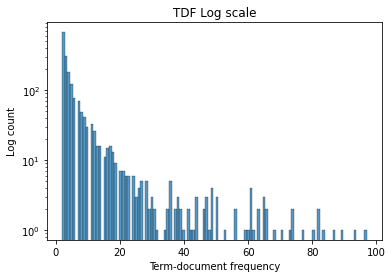

In [9]:
ax = sns.histplot(data = and_td_a.query("Count<=100"), x="Count",log_scale=(False,True)).set(title="histogram")
plt.xlabel('Term-document frequency')
plt.ylabel('Log count')
plt.title('TDF Log scale')
ax

In [10]:
and_td_a

,0,1,2,3,4,5,6,7,8,9,...,2402,2403,2404,2405,2406,2407,2408,Sum,Count,Group
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,25,25,2
aaron,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,4,2
aarones,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,3,1
abad,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,1
abid,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
þurst,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,1
þusend,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7,7,2
þwea,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,1
þweoran,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,1


<AxesSubplot: >

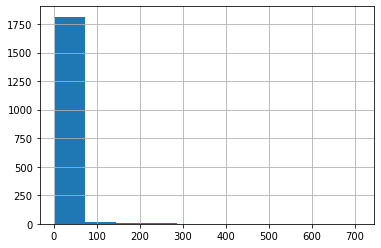

In [8]:
and_td_a.Count.hist()

In [16]:
lat_td_a["Group"].value_counts()

2    820
1    618
Name: Group, dtype: int64

Validate through relative cumulative frequencies how to group words with a similar amount of mentions

In [17]:
and_td_a["Count"].value_counts()/len(and_td_a)

2      0.365562
3      0.166757
4      0.098316
5      0.065725
6      0.041282
         ...   
93     0.000543
219    0.000543
131    0.000543
216    0.000543
504    0.000543
Name: Count, Length: 83, dtype: float64

In [18]:
#This does not work anymore as the Count is now filtered in the method
# Filter count 1 and calculate again
and_td_a_filt = and_td_a.query("Count>1")
lat_td_a_filt = lat_td_a.query("Count>1")

# Filter count 1 and calculate again
and_td_h_filt = and_td_h.query("Count>1")
lat_td_h_filt = lat_td_h.query("Count>1")

# Filter count 1 and calculate again
and_td_l_filt = and_td_l.query("Count>1")
lat_td_l_filt = lat_td_l.query("Count>1")

# Filter count 1 and calculate again
and_td_n_filt = and_td_n.query("Count>1")
lat_td_n_filt = lat_td_n.query("Count>1")

In [20]:
#First Idea: count 2 and 3 one group, others, another group

In [22]:
lat_td_a_filt["Count"].value_counts().iloc[:5]/len(lat_td_a_filt) # ok

2    0.293463
3    0.136300
4    0.109875
5    0.066759
6    0.052851
Name: Count, dtype: float64

In [23]:
lat_td_h_filt["Count"].value_counts().iloc[:5]/len(lat_td_h_filt) # ok

2    0.288941
3    0.164330
4    0.102804
5    0.073988
6    0.056075
Name: Count, dtype: float64

In [24]:
lat_td_l_filt["Count"].value_counts().iloc[:5]/len(lat_td_l_filt) # ok

2    0.386010
3    0.181347
4    0.082902
6    0.059585
5    0.056995
Name: Count, dtype: float64

In [25]:
lat_td_n_filt["Count"].value_counts().iloc[:5]/len(lat_td_n_filt) # ok

2    0.428571
3    0.285714
5    0.095238
4    0.095238
8    0.047619
Name: Count, dtype: float64

In [26]:
and_td_a_filt["Count"].value_counts().iloc[:5]/len(and_td_a_filt) #ok

2    0.365562
3    0.166757
4    0.098316
5    0.065725
6    0.041282
Name: Count, dtype: float64

In [27]:
and_td_h_filt["Count"].value_counts().iloc[:5]/len(and_td_h_filt) #ok

2    0.394085
3    0.180655
4    0.085532
5    0.060751
6    0.032774
Name: Count, dtype: float64

In [28]:
and_td_l_filt["Count"].value_counts().iloc[:5]/len(and_td_l_filt) #ok

2    0.395939
3    0.187817
4    0.111675
5    0.065990
6    0.048223
Name: Count, dtype: float64

In [29]:
and_td_n_filt["Count"].value_counts().iloc[:5]/len(and_td_n_filt) #ok

2    0.45
3    0.25
4    0.15
5    0.10
6    0.05
Name: Count, dtype: float64

In [30]:
#Definition: Leave out words appearing only once, combine 2 and 3 in one category and 
# more than 3 in other


(array([1.814e+03, 1.500e+01, 3.000e+00, 3.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([  2. ,  72.8, 143.6, 214.4, 285.2, 356. , 426.8, 497.6, 568.4,
        639.2, 710. ]),
 <BarContainer object of 10 artists>)

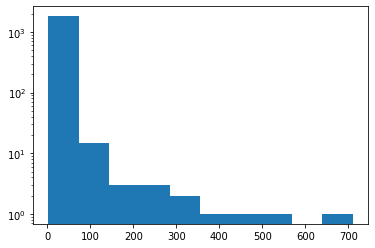

In [34]:
import matplotlib.pyplot as plt  
ax = plt.hist(and_td_a["Sum"], log=True)
#Add titles and axis names
ax

### Remove aggregated columns after correlation

In [35]:
#Function that returns a dataframe with correlations computed based on 2 datasets with
#Columns group

In [59]:
def compute_corr_by_group(df1,df2,manuscript):
    #Expected TD matrices
    list_dfs_by_group = []
    groups = df1["Group"].unique()
    for group in groups:
        df1_trans = df1[df1["Group"]==group].drop(["Group","Sum","Count"],axis=1).T
        df2_trans = df2[df2["Group"]==group].drop(["Group","Sum","Count"],axis=1).T

        df_corr = df1_trans.apply(df2_trans.corrwith)
        df_corr = df_corr.unstack().sort_values(kind="quicksort",ascending=False)
        df_corr = df_corr.reset_index(drop=False)
        df_corr.columns = ["english","latin","corr"]
        df_corr = df_corr.drop_duplicates(subset=["english"])
        df_corr["group"] = group
        df_corr["manuscript"] = manuscript

        list_dfs_by_group.append(df_corr)
    
    return pd.concat(list_dfs_by_group)

In [60]:
#Takes too long.

In [79]:
list_words = []
for k,v in dict_td_matrices.items():
    ang_td_matrix, lat_td_matrix = v
    list_words.extend(ang_td_matrix.index)

In [81]:
len(set(list_words))

7773

In [76]:
and_td_a, lat_td_a = dict_td_matrices["A"]

In [67]:
#Gotta do this first with N to ensure structure, then run the whole thing
# Lasts 7 minutes with the longest

df_corr_list = []

for k,v in dict_td_matrices.items():
    ang_td_matrix, lat_td_matrix = v
    df_corr_list.append(compute_corr_by_group(ang_td_matrix,lat_td_matrix,k))


In [74]:
#Export this result
df_result = pd.concat(df_corr_list)
df_result.to_excel("correlations.xlsx",index=False)